In [1]:
import wisps
import splat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s=wisps.Source(name='par199-00009')

plotting standard for par199-00009


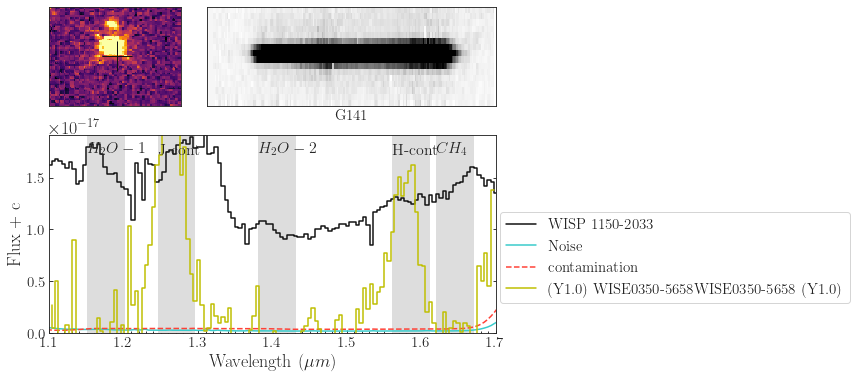

In [3]:
s.plot()

In [4]:
dt=wisps.COMBINED_PHOTO_SPECTRO_DATA

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as astrocoord

In [6]:
ALL_COORDINATES=SkyCoord(dt.RA*u.deg, dt.DEC*u.deg)

In [7]:
def match_to_catalog(spec):
    #plots the nearest object nearit
    match=astrocoord.match_coordinates_sky(spec.coords, ALL_COORDINATES, nthneighbor=10)
    print (match)
    matchs=wisps.Source(name=dt.loc[match[0]].grism_id)
    matchs.plot()
    

In [8]:
s=wisps.Source(name='par199-00011')

In [9]:
s2=wisps.Source(name='par156-00041')

(array(78833), <Angle [0.00291468] deg>, <Quantity 5.08707472e-05>)
plotting standard for par199-00004


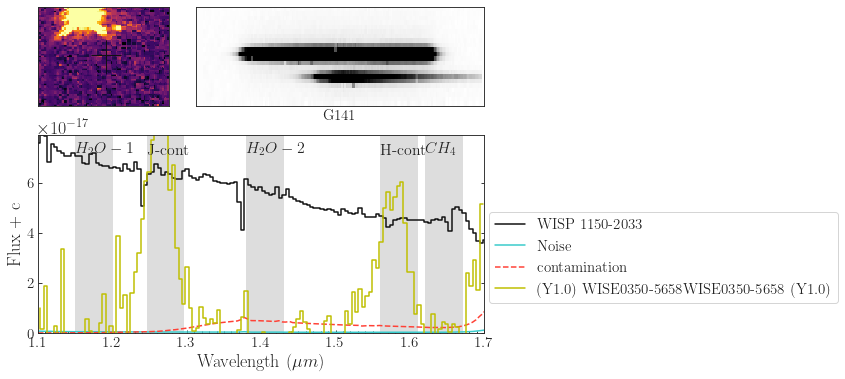

In [10]:
match_to_catalog(s)

(array(98681), <Angle [0.00275678] deg>, <Quantity 4.81148553e-05>)
plotting standard for par156-00198


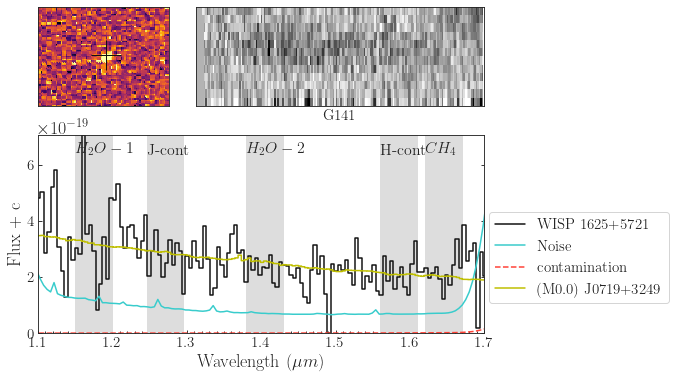

In [11]:
match_to_catalog(s2)

In [12]:
s2.shortname

'WISP 1625+5721'